In [1]:
from apts import *
%matplotlib inline  

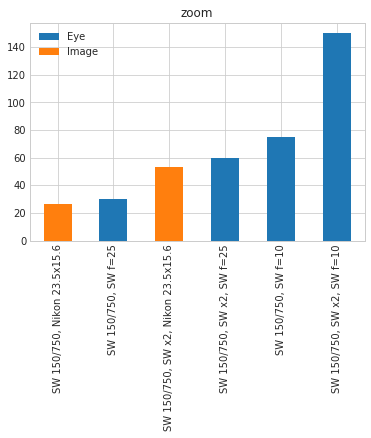

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot('zoom')

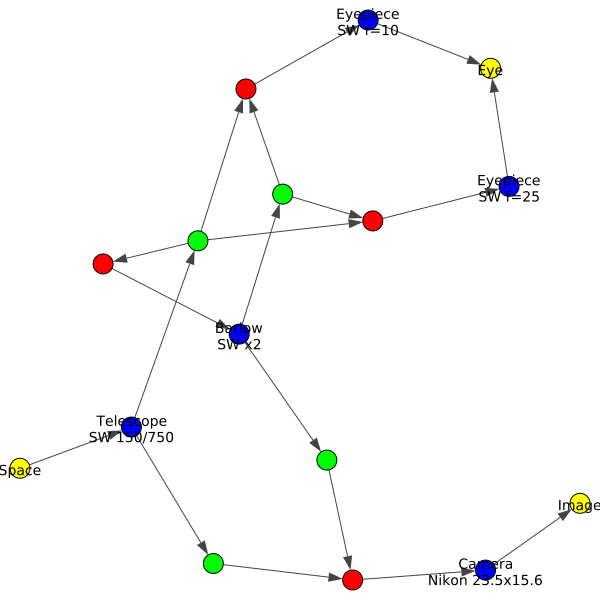

In [3]:
e.plot_connection_garph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
observations.Conditions.MIN_TEMPERATURE = -10

place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

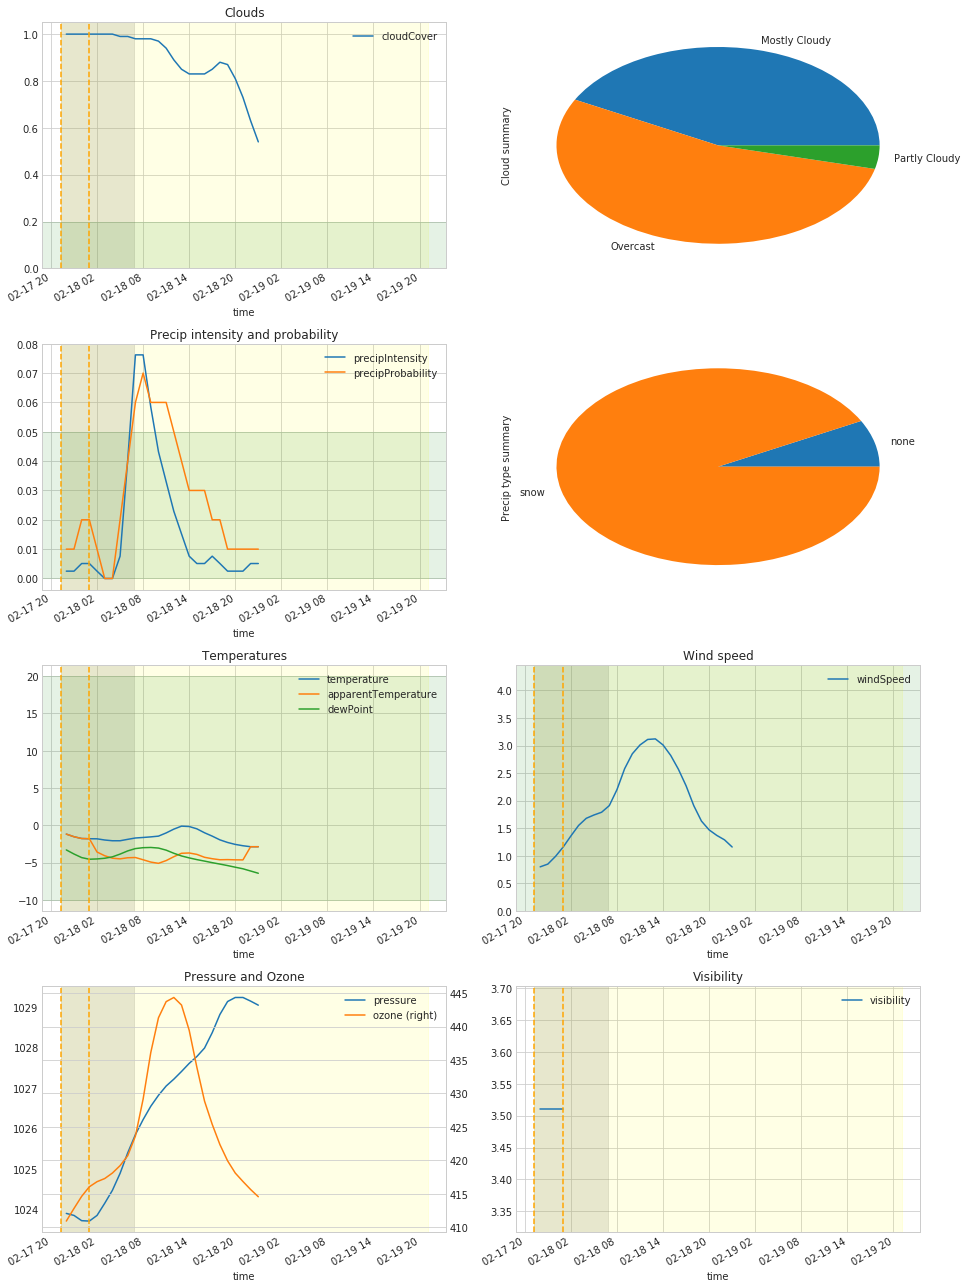

In [6]:
o.plot_weather()

In [7]:
o.weather_is_good()

False

In [8]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [9]:
o.local_planets.objects

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7f141195f668>",2018-02-19 12:03:28.095354+01:00,27.473604,-1.27,22.333318,-12.393082,1.371775,99.697189
1,"<Venus ""Venus"" at 0x7f141195f7f0>",2018-02-19 12:34:11.512411+01:00,30.942762,-3.79,22.846780,-8.919883,1.679977,98.586555
2,"<Mars ""Mars"" at 0x7f141195f978>",2018-02-19 06:36:58.654326+01:00,17.781762,0.96,16.876909,-22.103866,1.496207,89.762016
3,"<ephem.Jupiter ""Jupiter"" at 0x7f14109a4480>",2018-02-19 05:07:06.691608+01:00,22.544293,-1.94,15.375041,-17.330096,5.202008,99.177948
4,"<ephem.Saturn ""Saturn"" at 0x7f14109a45f0>",2018-02-19 08:12:26.574455+01:00,17.487776,0.57,18.472354,-22.398738,10.614018,99.841743
5,"<Uranus ""Uranus"" at 0x7f141195fb00>",2018-02-18 15:22:11.464353+01:00,49.200906,5.86,1.588725,9.351022,20.438881,99.957962
6,"<Neptune ""Neptune"" at 0x7f141195fc88>",2018-02-19 12:43:42.964915+01:00,32.516191,7.96,23.005952,-7.344878,30.907476,99.998680


In [10]:
o.get_visible_planets()

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase


In [11]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
43,M44,Beehive Cluster (Praesepe),NGC 2632,Open Cluster,Cancer,3.7,577,8.668333,19.983333,95.0,95.0,2018-02-17 22:30:47.133605+01:00,59.761874
66,M67,-,NGC 2682,Open Cluster,Cancer,6.1,2700,8.840000,11.816667,30.0,30.0,2018-02-17 22:41:00.481547+01:00,51.594918
80,M81,Bode's Galaxy,NGC 3031,Spiral Galaxy,Ursa Major,6.9,12000000,9.926667,69.066667,21.0,10.0,2018-02-17 23:46:31.572036+01:00,71.189942
81,M82,Cigar Galaxy,NGC 3034,Irregular Galaxy,Ursa Major,8.4,12000000,9.930000,69.683333,9.0,4.0,2018-02-17 23:46:44.621150+01:00,70.573497


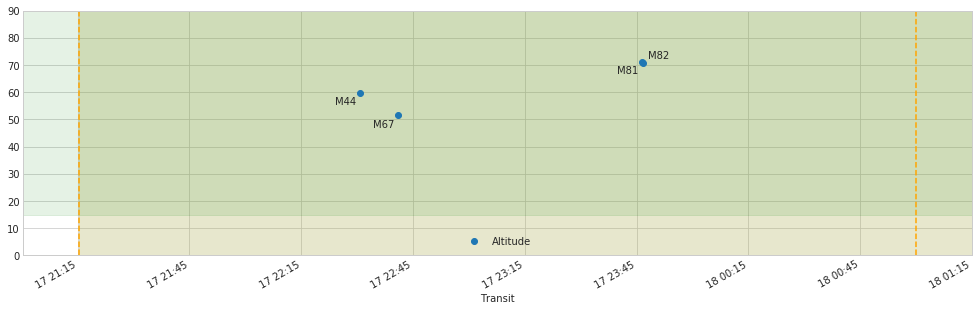

In [12]:
o.plot_messier()

In [13]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [14]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)